# ANN Notebook part 1 - Classification and Regression
*by*: **Nikolaj Krebs Pedersen - nped@itu.dk**

This notebook explores how to create Artificial Neural Networks for both classification and regression. For this notebook, we will use the preprocessed data from "PCA // Clustering // Classification" by Anton Golles. First, we will go through Data prep then Classification followed by Regression.

In [15]:
#pip install tensorflow

In [16]:
#pip install scikeras

In [17]:
#pip install keras

In [18]:
# Import the Pandas library for data manipulation and analysis
import pandas as pd

# Import the NumPy library for numerical operations
import numpy as np

# Import Matplotlib for plotting and visualization
import matplotlib.pyplot as plt

# Import Seaborn for statistical data visualization
import seaborn as sns

# Import confusion_matrix and classification_report for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Import accuracy_score for calculating the accuracy of the model
from sklearn.metrics import accuracy_score

# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Import train_test_split for splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

# Import TensorFlow for machine learning
import tensorflow as tf

# Import Keras for high-level neural networks API
from tensorflow import keras

# Import Dense and Activation layers for neural network architecture
from tensorflow.keras.layers import Dense, Activation

# Import Sequential for linear stacking of layers
from keras.models import Sequential

# Import preprocessing for data preprocessing (although you already imported StandardScaler)
from sklearn import preprocessing

# Import RandomizedSearchCV for hyperparameter tuning using randomized search
from sklearn.model_selection import RandomizedSearchCV

# Import KerasClassifier to make Keras models compatible with scikit-learn
from scikeras.wrappers import KerasClassifier

# Import GridSearchCV for hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

In [19]:
df = pd.read_csv('data/cleaned.csv')
df

,gender,age,country_of_birth,weight,height,bmi,average_daily_step_count,resting_heart_rate,heart_rate_variability,average_blood_glucose,...,systolic,diastolic,mother_Hypertension,mother_No known health issues,mother_Type 2 diabetes,diet_type_Balanced,diet_type_Low-carb,diet_type_Mediterranean,diet_type_Other,diet_type_Plant-based
0,1,45,7,70.0,165.0,25.71,7997,75,51.0,6.7,...,120.0,80.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,32,18,62.5,165.0,22.92,7895,63,61.0,6.6,...,120.0,80.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,28,45,65.0,165.0,23.87,7995,67,54.0,6.6,...,120.0,80.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,45,34,65.0,160.0,25.39,8005,65,66.0,7.5,...,120.0,80.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,35,4,65.0,160.0,25.40,7995,79,65.0,6.7,...,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,45,71,68.5,165.0,25.10,8002,63,69.0,7.5,...,120.0,80.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
296,1,32,70,65.0,165.0,23.87,7828,67,63.0,5.8,...,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
297,1,35,14,60.0,165.0,22.04,7999,66,71.0,5.8,...,120.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
298,1,32,30,65.0,165.0,23.87,7546,77,53.0,7.0,...,120.0,80.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df.stress_level.unique()

array([1. , 0. , 0.6])

# Correlation Matrix

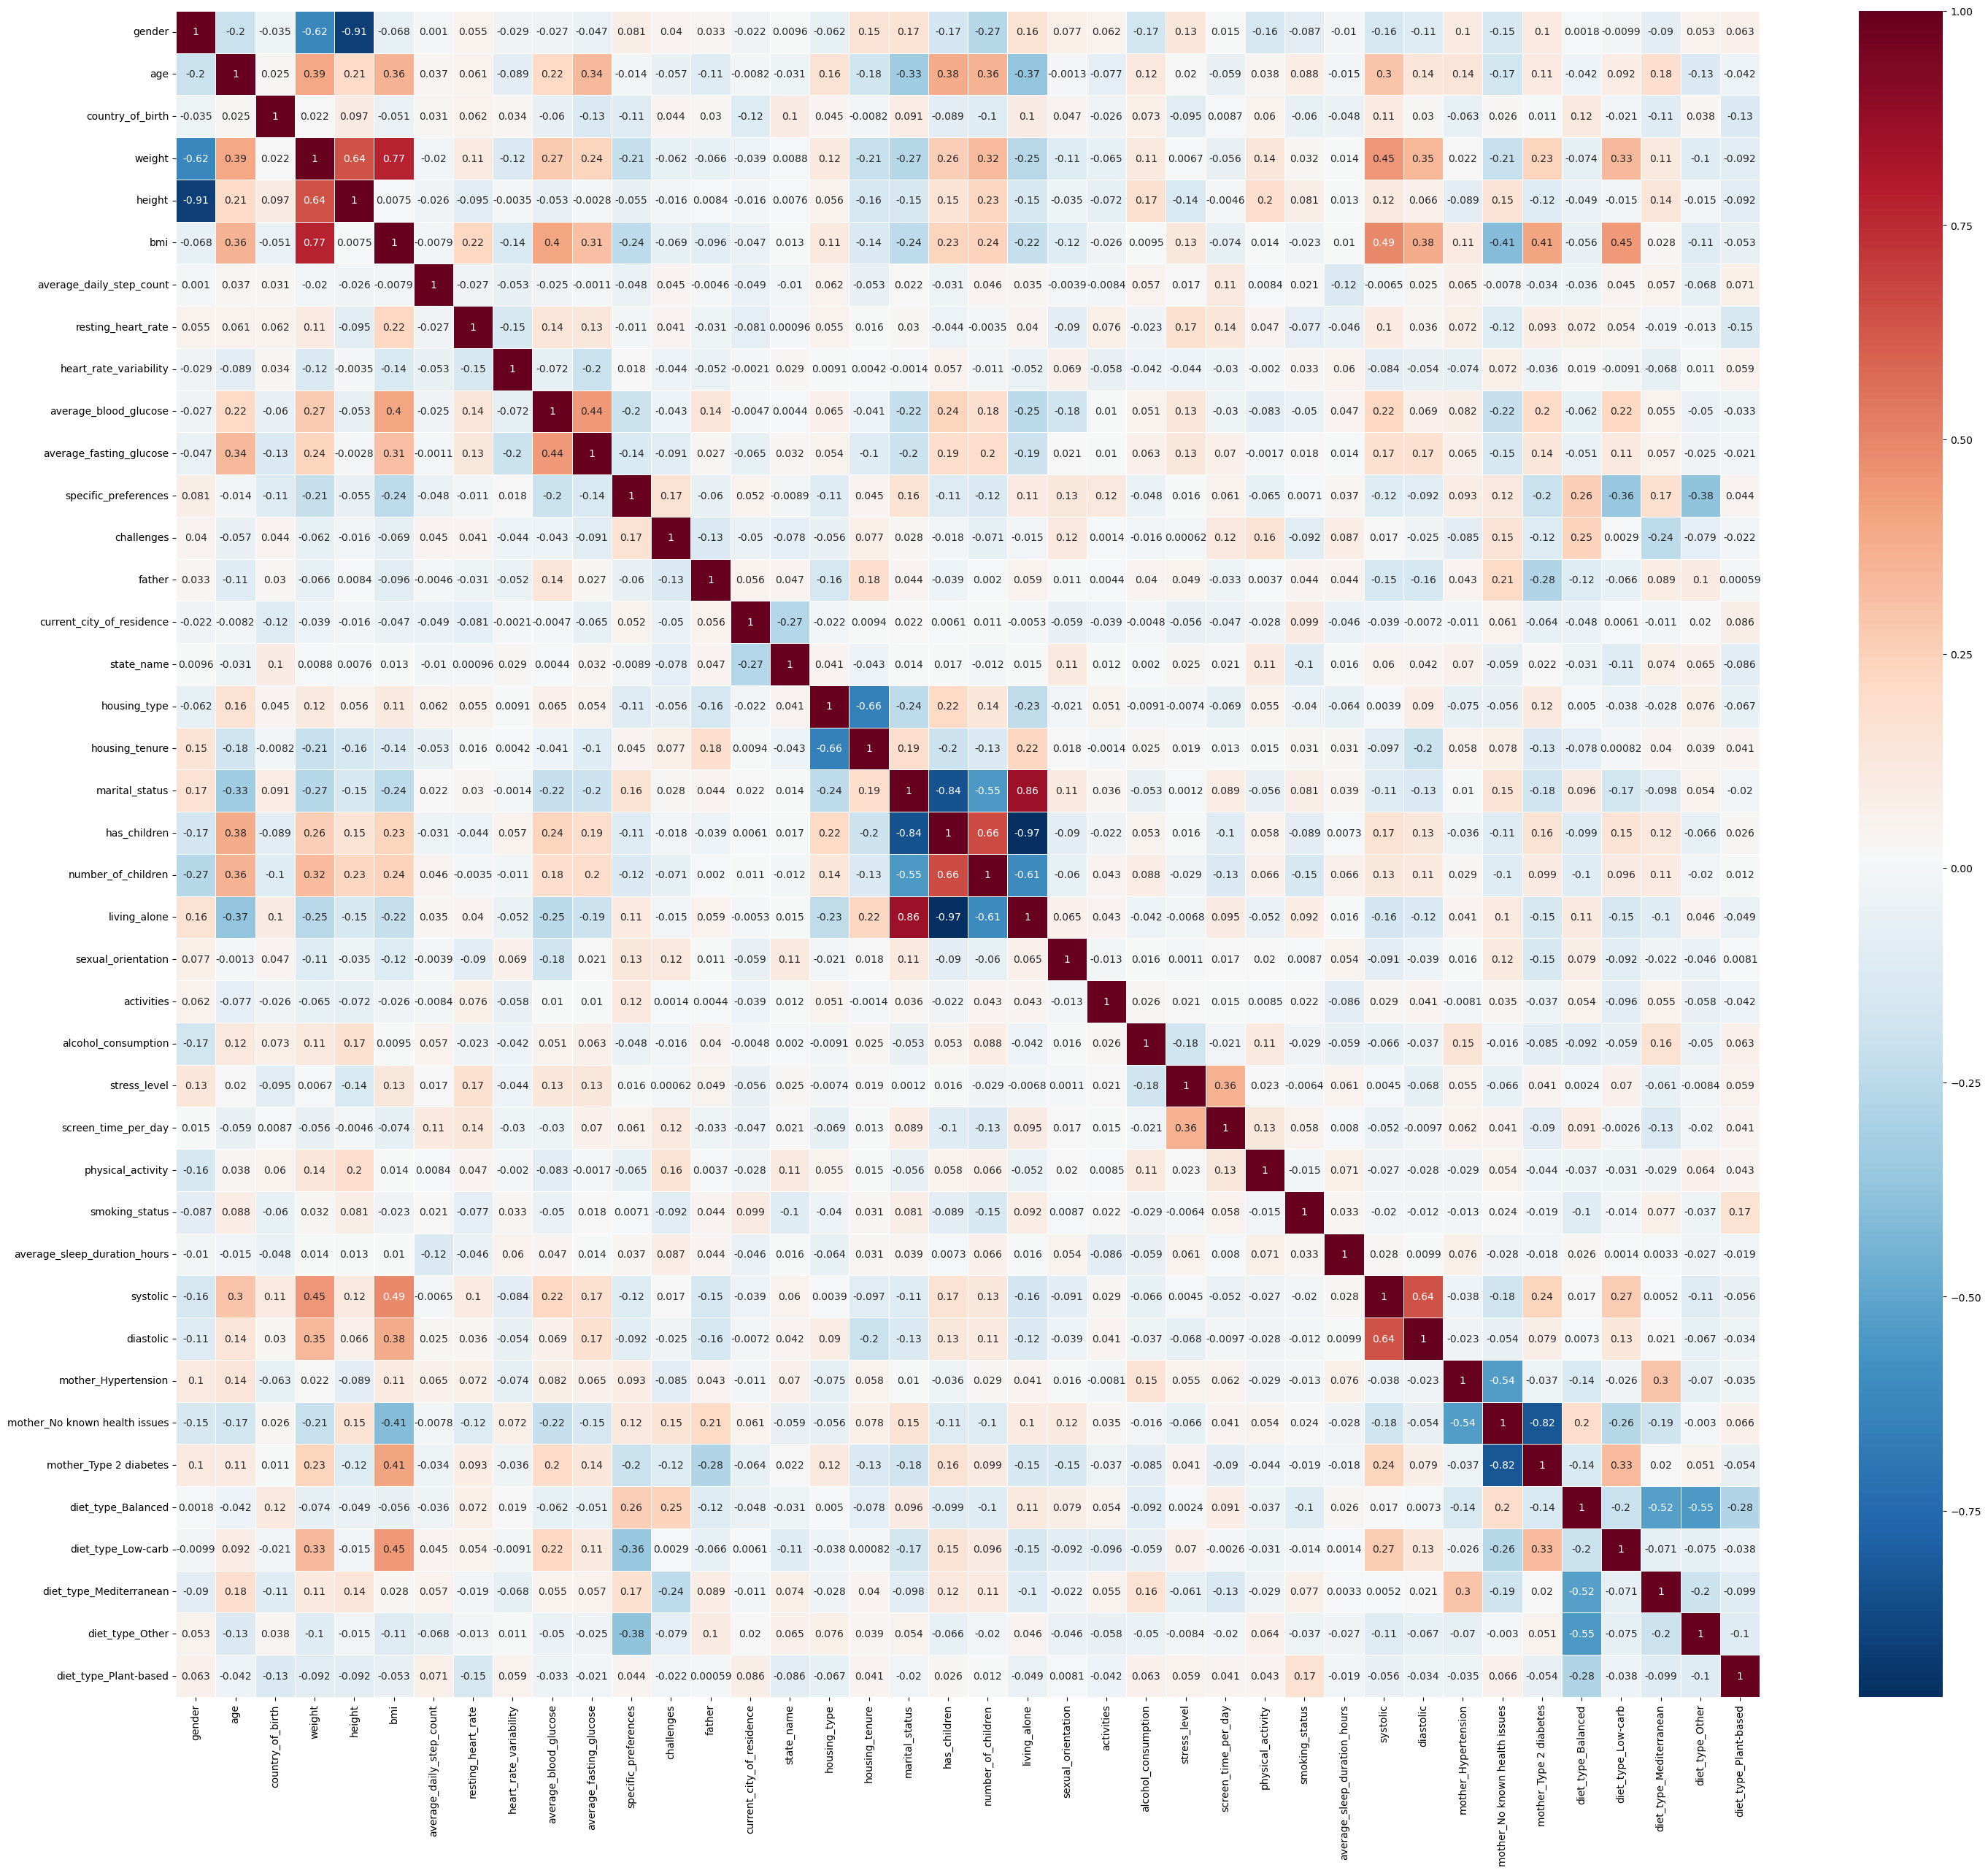

In [21]:
# Compute the pairwise Pearson correlation matrix for df.
# The Pearson correlation coefficient measures the linear relationship between two variables.
# Its value ranges from -1 to 1, where:
# - 1 implies a perfect positive linear relationship,
# - -1 implies a perfect negative linear relationship, and
# - 0 implies no linear relationship.
corr = df.corr(method='pearson')

# Create a new figure and axis with a specified size.
# Adjust the figsize values to change the size of each cell in the heatmap.
fig, ax = plt.subplots(figsize=(35, 30))

# Create a heatmap using Seaborn.
# - `corr`: The computed correlation matrix.
# - `xticklabels` & `yticklabels`: Use the columns of the correlation matrix for labeling the x and y axis respectively.
#   blue represents positive correlations and red represents negative correlations.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)

# Display the plot.
plt.show()


## ANN - Classification
The following section will present the creation of an ANN that is used for classification.

We will try an solve the same issues as presented in the last exercise.
1. Start by defining the independent variables and the dependent variable
2. Split the dataset into test and train (this is done in the same way as any other method)
3. Creation of ANN model - including input layer, hidden layers, and output layer
4. Then train (fit) the model
5. Evaluate results
6. Investigate optimization of the model (Hyperparameter tuning)

In [22]:
# Drop the 'stress_level' column from the DataFrame and store the remaining columns as a NumPy array in variable X.
# We assume 'df' is a previously defined DataFrame containing your data.
X = df.drop(['stress_level'], axis=1).values

# Store the 'stress_level' column as a NumPy array in variable y. (round the values to the nearest integer,
# as imputation introduces some floating point values)
y = np.round(df['stress_level'].values)

# Scale the features in the X array using StandardScaler.
# This standardizes the feature set to have mean=0 and variance=1, which often helps in training machine learning models.
X = StandardScaler().fit_transform(X)

In [23]:
# Split the dataset into training and test sets using train_test_split.
# 33% of the data will be used for testing, and the rest for training.
# The random_state parameter is set to 42 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('y_train.shape:',y_train.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (201, 39)
X_test.shape: (99, 39)
y_train.shape: (201,)
y_test.shape: (99,)


In [25]:
# Create an instance of a Keras Sequential model.
# Sequential models are appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model = keras.models.Sequential()

# Add an Input layer to the model.
# The 'shape' argument specifies the shape of the input data, which here matches the number of features in X_train.
model.add(keras.layers.Input(shape=X_train.shape[1]))

# Add the first hidden layer with 30 units and ReLU (Rectified Linear Unit) activation function.
# ReLU activation function replaces all negative values in the output with zero.
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))


# Add the second hidden layer with 15 units and ReLU activation function.
model.add(keras.layers.Dense(15, activation='relu'))

# Add the output layer with a single unit and a sigmoid activation function.
# The sigmoid function is often used in the output layer of a binary classification problem.
# It squashes the output to lie in the range of 0 to 1, which can be interpreted as probabilities.
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                1200      
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 30)                930       
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dense_11 (Dense)            (None, 30)                930       
                                                                 
 dense_12 (Dense)            (None, 15)                465       
                                                                 
 dense_13 (Dense)            (None, 1)                

In [26]:
# Compile the model with the necessary attributes.
# - loss function: 'binary_crossentropy' is commonly used for binary classification problems.
# - optimizer: 'adam' is an adaptive learning rate optimization algorithm.
# - metrics: 'acc' for accuracy and 'AUC' for Area Under the Curve are used to evaluate the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])

1. loss is Loss Function and defines training process
2. optimizer is a function that modifies the weights and learning rate to increase the performance.
3. metrics is determine how to evaluate the model performance

4. batch_size is a number that determines the samples processed before the model is updated
5. epochs is determine the number of iterations/cycles the model should go through
6. validation_split splits the given data into another validation dataset used to tune the model and increase performance

In [27]:
# Train the model using the training data
# - X_train and y_train are the features and labels, respectively.
# - batch_size=32 indicates the number of samples to use for each gradient update.
# - epochs=10 specifies that the entire dataset will be passed through the network 10 times.
# - validation_split=0.33 reserves 33% of the training data for validation purposes to fine-tune the model parameters.
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.33)

Epoch 1/20


5/5 [==============================] - 1s 94ms/step - loss: 0.6977 - acc: 0.4701 - auc: 0.4632 - val_loss: 0.6877 - val_acc: 0.5672 - val_auc: 0.5462
Epoch 2/20
5/5 [==============================] - 0s 27ms/step - loss: 0.6859 - acc: 0.5522 - auc: 0.5829 - val_loss: 0.6913 - val_acc: 0.5075 - val_auc: 0.5577
Epoch 3/20
5/5 [==============================] - 0s 26ms/step - loss: 0.6799 - acc: 0.5821 - auc: 0.6691 - val_loss: 0.6895 - val_acc: 0.4627 - val_auc: 0.5554
Epoch 4/20
5/5 [==============================] - 0s 28ms/step - loss: 0.6722 - acc: 0.6418 - auc: 0.7301 - val_loss: 0.6884 - val_acc: 0.4478 - val_auc: 0.5531
Epoch 5/20
5/5 [==============================] - 0s 28ms/step - loss: 0.6655 - acc: 0.6716 - auc: 0.7633 - val_loss: 0.6881 - val_acc: 0.4925 - val_auc: 0.5375
Epoch 6/20
5/5 [==============================] - 0s 27ms/step - loss: 0.6579 - acc: 0.7313 - auc: 0.7750 - val_loss: 0.6858 - val_acc: 0.4776 - val_auc: 0.5485
Epoch 7/20
5/5 [=============================

dict_keys(['loss', 'acc', 'auc', 'val_loss', 'val_acc', 'val_auc'])


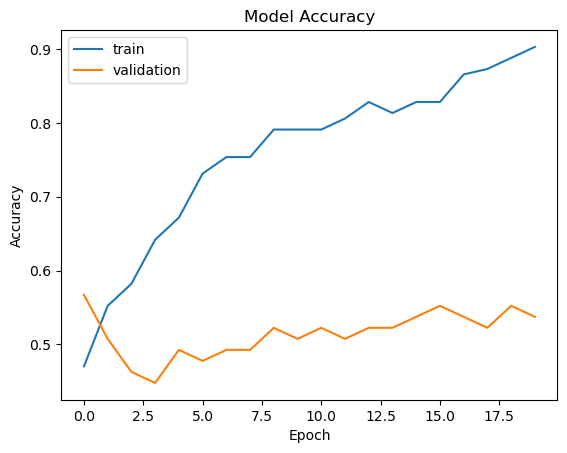

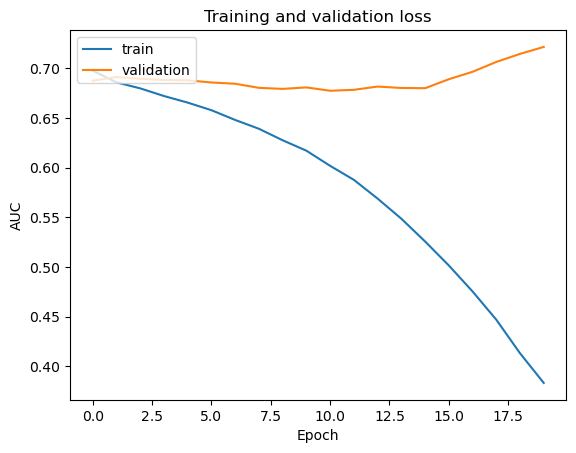

In [28]:
# Print the keys available in the 'history' object.
# This usually includes things like 'loss' and the metrics you chose to monitor, which are 'acc' and 'AUC' in this case.
print(history.history.keys())

# Plot training & validation accuracy values ('acc')
# The 'history.history' dictionary stores the history of training/validation accuracy and loss values for each epoch.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

# Add title and axis labels to the plot.
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

# Plot training & validation AUC values ('AUC')
# The 'history.history' dictionary stores the history of training/validation AUC values for each epoch.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Add title and axis labels to the plot.
plt.title('Training and validation loss')
plt.ylabel('AUC')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

In [29]:
# Generate predictions using the trained model on the test data
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred.round())

4/4 [==============================] - 0s 4ms/step


0.48484848484848486

In [30]:
# Print a summary classification report showing the precision, recall, F1-score, and support for each class.
# The metrics are calculated based on the rounded predicted values (`y_pred.round()`) and true labels (`y_test`).
print(classification_report(y_test, y_pred.round()))


              precision    recall  f1-score   support

         0.0       0.42      0.49      0.45        43
         1.0       0.55      0.48      0.51        56

    accuracy                           0.48        99
   macro avg       0.49      0.49      0.48        99
weighted avg       0.49      0.48      0.49        99



With this architecture, we can see that we got an accuracy of 0.79. When we conducted KNN we got an accuracy of 0.77.

To further train our model we can continue to run through the .fit method, as it continues to train the model and possibly increase accuracy.

Instead of manually running the method we can implement the callback function: Earlystopping. It allows for the model to stop training when the model does not see an increase within the training. These parameters are determined by "monitor" and "patience"

In [31]:
# Initialize a Sequential model
# Sequential models are a linear stack of layers where you can easily add various layers to it.
model = keras.models.Sequential()

# Add an Input layer to the model
# This layer specifies the shape of the input data, which matches the number of features in X_train.
model.add(keras.layers.Input(shape=X_train.shape[1]))

# Add the first hidden layer with 30 units and ReLU activation function.
model.add(keras.layers.Dense(30, activation='relu'))


# Add the second hidden layer with 15 units and ReLU activation function.
model.add(keras.layers.Dense(15, activation='relu'))

# Add the output layer with a single unit and sigmoid activation function for binary classification.
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
# This prepares the model for training and specifies the loss function, optimizer, and metrics.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])

# Train the model with early stopping
# The model will train until the monitored metric ('acc') stops improving for 'patience' epochs.
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.33,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='acc', patience=10)])

Epoch 1/100
5/5 [==============================] - 1s 72ms/step - loss: 0.7371 - acc: 0.5000 - auc: 0.4838 - val_loss: 0.7733 - val_acc: 0.4179 - val_auc: 0.3695
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 0.7125 - acc: 0.5224 - auc: 0.5234 - val_loss: 0.7707 - val_acc: 0.4030 - val_auc: 0.3741
Epoch 3/100
5/5 [==============================] - 0s 23ms/step - loss: 0.6928 - acc: 0.5448 - auc: 0.5545 - val_loss: 0.7686 - val_acc: 0.4030 - val_auc: 0.3768
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 0.6773 - acc: 0.5597 - auc: 0.5897 - val_loss: 0.7672 - val_acc: 0.4030 - val_auc: 0.3828
Epoch 5/100
5/5 [==============================] - 0s 22ms/step - loss: 0.6633 - acc: 0.5896 - auc: 0.6230 - val_loss: 0.7658 - val_acc: 0.4030 - val_auc: 0.3906
Epoch 6/100
5/5 [==============================] - 0s 22ms/step - loss: 0.6511 - acc: 0.6269 - auc: 0.6608 - val_loss: 0.7651 - val_acc: 0.4179 - val_auc: 0.3910
Epoch 7/100
5/5 [===========

dict_keys(['loss', 'acc', 'auc', 'val_loss', 'val_acc', 'val_auc'])


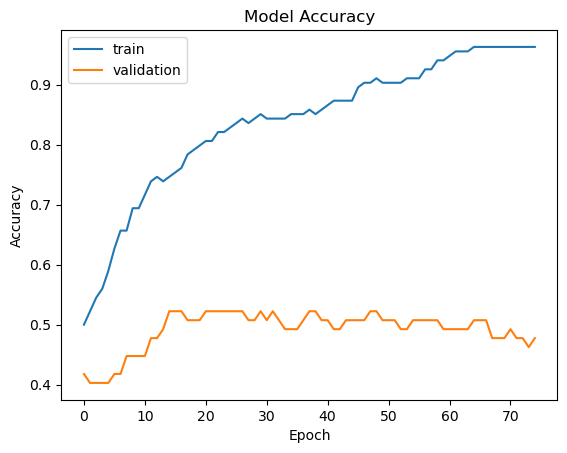

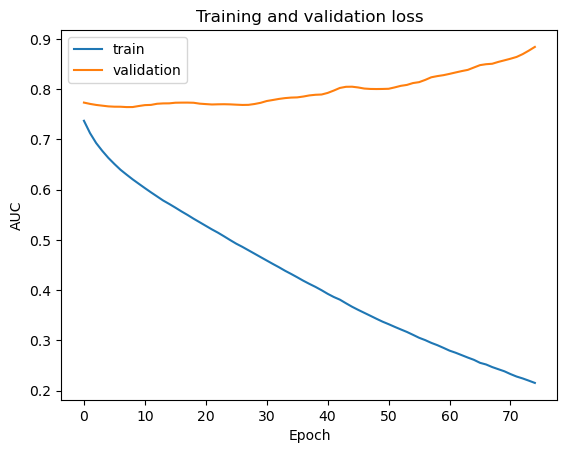

In [32]:
# Print the keys available in the 'history' object.
# This usually includes things like 'loss' and the metrics you chose to monitor, which are 'acc' and 'AUC' in this case.
print(history.history.keys())

# Plot training & validation accuracy values ('acc')
# The 'history.history' dictionary stores the history of training/validation accuracy and loss values for each epoch.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

# Add title and axis labels to the plot.
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

# Plot training & validation AUC values ('AUC')
# The 'history.history' dictionary stores the history of training/validation AUC values for each epoch.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Add title and axis labels to the plot.
plt.title('Training and validation loss')
plt.ylabel('AUC')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

In [33]:
# Generate predictions using the trained model on the test data
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred.round())

4/4 [==============================] - 0s 3ms/step


0.5555555555555556

In [34]:
# Print a summary classification report showing the precision, recall, F1-score, and support for each class.
# The metrics are calculated based on the rounded predicted values (`y_pred.round()`) and true labels (`y_test`).
print(classification_report(y_test, y_pred.round()))


              precision    recall  f1-score   support

         0.0       0.49      0.63      0.55        43
         1.0       0.64      0.50      0.56        56

    accuracy                           0.56        99
   macro avg       0.56      0.56      0.56        99
weighted avg       0.57      0.56      0.56        99



## Hyperparameter tuning with Grid Search
To further increase the performance of the ANN we will look into hyperparameters and see what we can change to increase accuracy. Following what is described in ** the hyperparameters that have the most impact are number of "hidden layers", number of "neurons", and "learning_rate

1. We will create a function that creates an ANN model
2. Determine a dictionary that contains all hyperparameters we wish to investigate
3. Conduct Random Search
4. Evaluate best parameters
5. Create a new model, train it, and evaluate

In [35]:
# Define a function named 'create_model' that takes 'layers' and 'activation' as parameters.
def create_model(layers, activation):
    # Initialize an empty Sequential model.
    model = Sequential()

    # Loop through the list of layers specified in the 'layers' parameter.
    # The 'enumerate' function returns both the index 'i' and the value 'nodes' of each layer.
    for i, nodes in enumerate(layers):
        # If it's the first layer (i == 0), add an input dimension.
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        # For subsequent layers, no need to specify the input dimension.
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))

    # Add the output layer with a single unit. No activation function is specified here,
    # which means a linear activation function will be used by default.
    model.add(Dense(1))

    # Compile the model with the 'adam' optimizer and 'binary_crossentropy' loss function.
    # Metrics used for evaluation is accuracy.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Return the compiled model.
    return model

In [36]:
# Create a KerasClassifier object wrapping the 'create_model' function.
# Here 'verbose=0' suppresses the output during the training process.
# Default activation function is set to 'relu', and default layers set to 20 (this is somewhat unconventional,
# typically 'layers' would be a list indicating neurons per layer).
model = KerasClassifier(model=create_model, verbose=0, activation='relu', layers=20)

# Specify different architectures (layer configurations) and activation functions for the grid search.
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']

# Create a dictionary that holds the different hyperparameters and their possible values.
param_grid = dict(layers=layers, activation=activations, batch_size=[128, 256], epochs=[30])

# Use GridSearchCV to search through the hyperparameter space.
# The estimator is the KerasClassifier, and the parameter grid is specified by 'param_grid'.

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring = 'accuracy', cv=5).fit(X_train, y_train)



In [37]:
# Fit the GridSearchCV object on the training data
# This will perform cross-validation for each combination of hyperparameters specified in 'param_grid'
grid_search = grid.fit(X_train, y_train)

# Retrieve the best score and best parameters from the grid search
[grid_search.best_score_, grid_search.best_params_]


[0.5821951219512196,
 {'activation': 'relu', 'batch_size': 256, 'epochs': 30, 'layers': [40, 20]}]

In [38]:
# Initialize an empty Sequential model from Keras.
model = keras.models.Sequential()

# Add an Input layer that specifies the shape of the input data,
# which corresponds to the number of features in X_train.
model.add(keras.layers.Input(shape=X_train.shape[1]))

# Add a hidden Dense layer with 20 units and ReLU (Rectified Linear Unit) activation function.
model.add(keras.layers.Dense(45, activation='relu'))

# Add a hidden Dense layer with 20 units and ReLU (Rectified Linear Unit) activation function.
model.add(keras.layers.Dense(30, activation='relu'))

# Add a hidden Dense layer with 20 units and ReLU (Rectified Linear Unit) activation function.
model.add(keras.layers.Dense(15, activation='relu'))

# Add an output layer with 1 unit and a sigmoid activation function,
# suitable for binary classification.
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model, specifying the loss function, optimizer, and metrics for evaluation.
# The Adam optimizer is used with a learning rate of 0.0003.
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0003),
              metrics=['acc', 'AUC'])

# Display a summary of the model architecture.
model.summary()


Model: "sequential_125"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_384 (Dense)           (None, 45)                1800      
                                                                 
 dense_385 (Dense)           (None, 30)                1380      
                                                                 
 dense_386 (Dense)           (None, 15)                465       
                                                                 
 dense_387 (Dense)           (None, 1)                 16        
                                                                 
Total params: 3,661
Trainable params: 3,661
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Fit the model on the training data
# Use a batch size of 128 and train for a maximum of 30 epochs
# A portion (33%) of the training data will be used as validation data
# Early stopping is applied based on the training accuracy ('acc')
history = model.fit(X_train, y_train, batch_size=256, epochs=30, validation_split=0.33,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='acc', patience=10)])

Epoch 1/30
1/1 [==============================] - 1s 925ms/step - loss: 0.7097 - acc: 0.5224 - auc: 0.4900 - val_loss: 0.7244 - val_acc: 0.3433 - val_auc: 0.4354
Epoch 2/30
1/1 [==============================] - 0s 52ms/step - loss: 0.7069 - acc: 0.5373 - auc: 0.4968 - val_loss: 0.7230 - val_acc: 0.3433 - val_auc: 0.4373
Epoch 3/30
1/1 [==============================] - 0s 55ms/step - loss: 0.7042 - acc: 0.5299 - auc: 0.5100 - val_loss: 0.7217 - val_acc: 0.3582 - val_auc: 0.4414
Epoch 4/30
1/1 [==============================] - 0s 51ms/step - loss: 0.7016 - acc: 0.5373 - auc: 0.5155 - val_loss: 0.7205 - val_acc: 0.3731 - val_auc: 0.4295
Epoch 5/30
1/1 [==============================] - 0s 52ms/step - loss: 0.6990 - acc: 0.5448 - auc: 0.5284 - val_loss: 0.7194 - val_acc: 0.3731 - val_auc: 0.4350
Epoch 6/30
1/1 [==============================] - 0s 51ms/step - loss: 0.6966 - acc: 0.5522 - auc: 0.5394 - val_loss: 0.7184 - val_acc: 0.3731 - val_auc: 0.4368
Epoch 7/30
1/1 [=================

dict_keys(['loss', 'acc', 'auc', 'val_loss', 'val_acc', 'val_auc'])


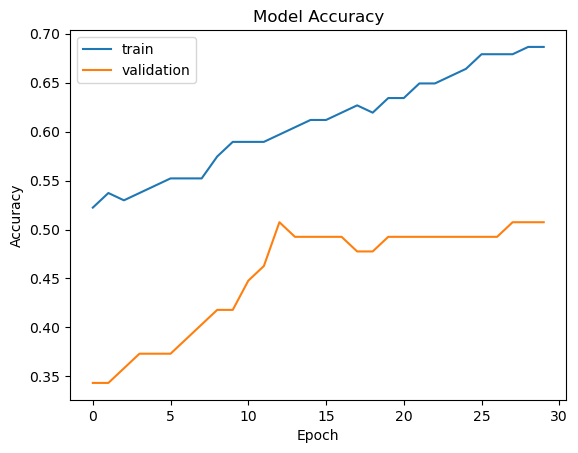

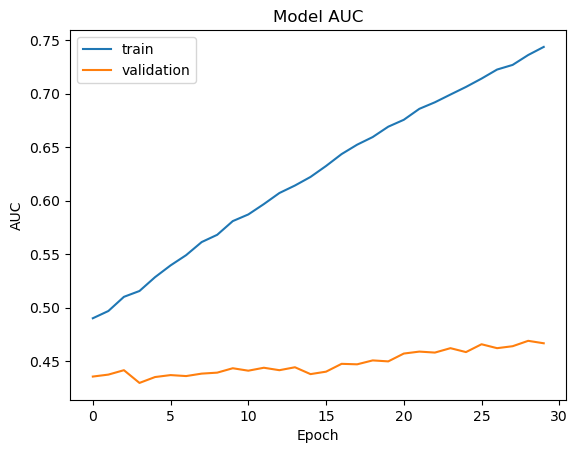

In [40]:
# Print the keys available in the 'history' object.
# This usually includes things like 'loss' and the metrics you chose to monitor, which are 'acc' and 'AUC' in this case.
print(history.history.keys())

# Plot training & validation accuracy values ('acc')
# The 'history.history' dictionary stores the history of training/validation accuracy and loss values for each epoch.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

# Add title and axis labels to the plot.
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

# Plot training & validation AUC values ('AUC')
# The 'history.history' dictionary stores the history of training/validation AUC values for each epoch.
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])

# Add title and axis labels to the plot.
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

In [41]:
accuracy_score(y_test, y_pred.round())

0.5555555555555556

Increase of 0.009 accuracy.

In [42]:
# Print a summary classification report showing the precision, recall, F1-score, and support for each class.
# The metrics are calculated based on the rounded predicted values (`y_pred.round()`) and true labels (`y_test`).
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

         0.0       0.49      0.63      0.55        43
         1.0       0.64      0.50      0.56        56

    accuracy                           0.56        99
   macro avg       0.56      0.56      0.56        99
weighted avg       0.57      0.56      0.56        99



Text(0, 0.5, 'Eigenvalue')

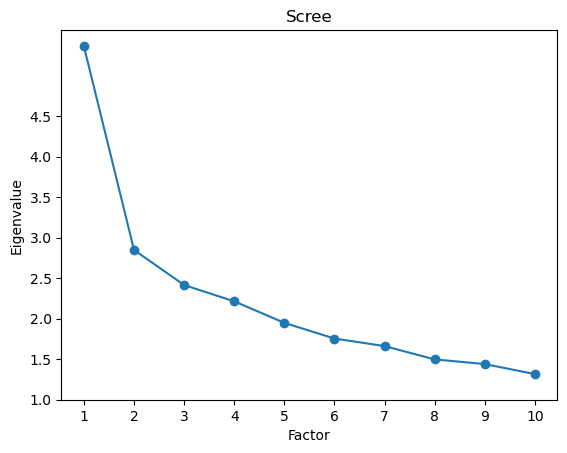

In [43]:
from sklearn.decomposition import PCA

# Initialize the StandardScaler object
# StandardScaler standardizes the dataset by setting the mean to 0 and variance to 1
scaler = StandardScaler()

# Create a list of all column names in the DataFrame for later use
column_list = df.columns.tolist()

# Fit and transform the DataFrame using StandardScaler
# The output will be a NumPy array of scaled features
df_scaled = scaler.fit_transform(df)

# Convert the NumPy array back to a DataFrame and use original column names
# Now df_scaled contains the scaled features of the original DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=column_list)
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis.
# It determines the adequacy for each observed variable and for the complete model.
# KMO estimates the proportion of variance among all the observed variable.
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1.
# NB! Value of KMO less than 0.6 is considered inadequate.

# Perform Principal Component Analysis (PCA) on the standardized DataFrame
# Initialize the PCA object and specify the number of components to keep (n_components)
pca = PCA(n_components=10)

# Fit the PCA model to the scaled data
# This computes the principal components of the data
pca.fit(df_scaled)

# Transform the scaled data into the new lower-dimensional representation
# The result is stored in a new DataFrame, where each column represents a principal component (PC)
df_pca_standard = pd.DataFrame(pca.transform(df_scaled), columns=['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5',
                                                                  'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10'])
# Create a scree plot to visualize the explained variance by each principal component
# The plot helps to decide how many principal components to keep

# Plot the explained variance values for each of the 10 principal components as a line plot
plt.plot(range(10), pca.explained_variance_)

# Add scatter points on the line plot for better visualization
plt.scatter(range(10), pca.explained_variance_)

# Set the title of the plot to 'Scree'
plt.title('Scree')

# Label the x-axis as 'Factor'
plt.xlabel('Factor')

# Set the x-axis tick labels, starting from 1 up to 10 (corresponding to PC_1 to PC_10)
plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])

# Set the y-axis tick labels
plt.yticks([4.5,4.0,3.5,3.0,2.5,2.0,1.5,1.0], [4.5,4.0,3.5,3.0,2.5,2.0,1.5,1.0])

# Label the y-axis as 'Eigenvalue'
plt.ylabel('Eigenvalue')

In [44]:
# Perform Principal Component Analysis (PCA) on the standardized DataFrame
pca = PCA(n_components=2)

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Transform the scaled data to the new lower-dimensional representation
# The transformed data is stored in a new DataFrame
df_pca_standard = pd.DataFrame(pca.transform(df_scaled))

# Retrieve the loadings (components) for each principal component
# These loadings indicate how each feature in the original data contributes to the principal components
components = pca.components_
# Calculate and display the explained variance for each principal component
# The explained variance ratio indicates the proportion of the dataset's total variance that is 'explained' by each component

# Store the explained variance ratio for each principal component in a variable
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
print(f'Explained Variance of each component: {explained_variance}')

# Calculate the cumulative explained variance
# This shows how much of the dataset's total variance is explained as you add each additional principal component

# Use NumPy's cumsum function to calculate the cumulative sum of the explained variance ratios
cumulative_variance = np.cumsum(explained_variance)

# Print the cumulative explained variance
print(f'Cumulative Explained Variance: {cumulative_variance}')
# Perform PCA transformation and create a DataFrame with the reduced principal components

# Apply PCA transformation to the scaled data
# This generates a NumPy array of the data projected onto the first 'n' principal components (in this case, 5)
principalComponents_reduced = pca.fit_transform(df_scaled)

# Create a new DataFrame from the NumPy array of reduced principal components
# The columns are named 'PC1', 'PC2', 'PC3', 'PC4', and 'PC5' representing the first five principal components
df_reduced = pd.DataFrame(data=principalComponents_reduced, columns=['PC1', 'PC2'])

# Show the DataFrame with the reduced components
df_reduced

Explained Variance of each component: [0.13348317 0.07094247]
Cumulative Explained Variance: [0.13348317 0.20442563]


,PC1,PC2
0,-0.514591,4.675924
1,-1.016359,-0.204349
2,-3.256168,1.140296
3,0.382876,0.238835
4,0.482507,0.685685
...,...,...
295,0.695926,-0.473057
296,-2.957824,0.896222
297,-1.124158,0.231759
298,-0.419284,4.373692


In [45]:
# Drop the 'stress_level' column from the DataFrame and store the remaining columns as a NumPy array in variable X.
# We assume 'df' is a previously defined DataFrame containing your data.
X = df_reduced.values

# Store the 'stress_level' column as a NumPy array in variable y.
y = df['diet_type_Mediterranean'].values

# Scale the features in the X array using StandardScaler.
# This standardizes the feature set to have mean=0 and variance=1, which often helps in training machine learning models.
X = StandardScaler().fit_transform(X)

In [46]:
# Split the dataset into training and test sets using train_test_split.
# 33% of the data will be used for testing, and the rest for training.
# The random_state parameter is set to 42 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('y_train.shape:',y_train.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (201, 2)
X_test.shape: (99, 2)
y_train.shape: (201,)
y_test.shape: (99,)


In [48]:
# Create an instance of a Keras Sequential model.
# Sequential models are appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model = keras.models.Sequential()

# Add an Input layer to the model.
# The 'shape' argument specifies the shape of the input data, which here matches the number of features in X_train.
model.add(keras.layers.Input(shape=X_train.shape[1]))

# Add the first hidden layer with 30 units and ReLU (Rectified Linear Unit) activation function.
# ReLU activation function replaces all negative values in the output with zero.
model.add(keras.layers.Dense(30, activation='relu'))

# Add the second hidden layer with 15 units and ReLU activation function.
model.add(keras.layers.Dense(15, activation='relu'))

# Add the output layer with a single unit and a sigmoid activation function.
# The sigmoid function is often used in the output layer of a binary classification problem.
# It squashes the output to lie in the range of 0 to 1, which can be interpreted as probabilities.
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_388 (Dense)           (None, 30)                90        
                                                                 
 dense_389 (Dense)           (None, 15)                465       
                                                                 
 dense_390 (Dense)           (None, 1)                 16        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the model with the necessary attributes.
# - loss function: 'binary_crossentropy' is commonly used for binary classification problems.
# - optimizer: 'adam' is an adaptive learning rate optimization algorithm.
# - metrics: 'acc' for accuracy and 'AUC' for Area Under the Curve are used to evaluate the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])

1. loss is Loss Function and defines training process
2. optimizer is a function that modifies the weights and learning rate to increase the performance.
3. metrics is determine how to evaluate the model performance

4. batch_size is a number that determines the samples processed before the model is updated
5. epochs is determine the number of iterations/cycles the model should go through
6. validation_split splits the given data into another validation dataset used to tune the model and increase performance

In [50]:
# Train the model using the training data
# - X_train and y_train are the features and labels, respectively.
# - batch_size=32 indicates the number of samples to use for each gradient update.
# - epochs=10 specifies that the entire dataset will be passed through the network 10 times.
# - validation_split=0.33 reserves 33% of the training data for validation purposes to fine-tune the model parameters.
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.33)

Epoch 1/10


5/5 [==============================] - 1s 76ms/step - loss: 0.6770 - acc: 0.5522 - auc: 0.4842 - val_loss: 0.6739 - val_acc: 0.7910 - val_auc: 0.4364
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 0.6487 - acc: 0.8209 - auc: 0.4963 - val_loss: 0.6485 - val_acc: 0.8209 - val_auc: 0.4470
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.6247 - acc: 0.8433 - auc: 0.4816 - val_loss: 0.6239 - val_acc: 0.8507 - val_auc: 0.4587
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 0.6007 - acc: 0.8433 - auc: 0.4759 - val_loss: 0.6000 - val_acc: 0.8955 - val_auc: 0.4492
Epoch 5/10
5/5 [==============================] - 0s 23ms/step - loss: 0.5779 - acc: 0.8582 - auc: 0.4820 - val_loss: 0.5774 - val_acc: 0.8806 - val_auc: 0.4544
Epoch 6/10
5/5 [==============================] - 0s 24ms/step - loss: 0.5572 - acc: 0.8507 - auc: 0.4846 - val_loss: 0.5559 - val_acc: 0.8806 - val_auc: 0.4333
Epoch 7/10
5/5 [=============================

dict_keys(['loss', 'acc', 'auc', 'val_loss', 'val_acc', 'val_auc'])


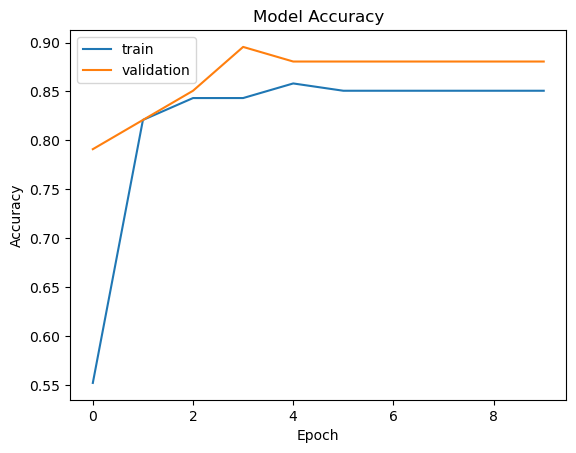

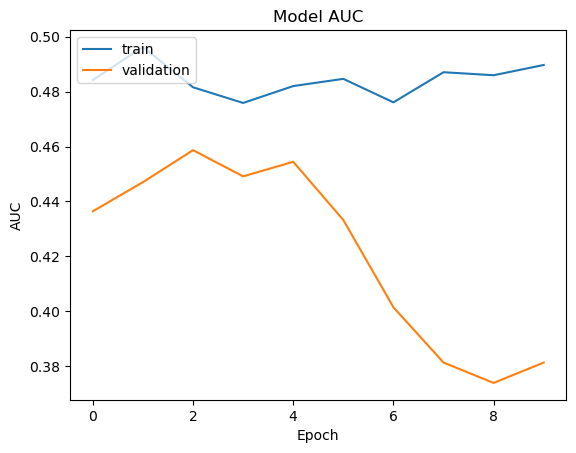

In [51]:
# Print the keys available in the 'history' object.
# This usually includes things like 'loss' and the metrics you chose to monitor, which are 'acc' and 'AUC' in this case.
print(history.history.keys())

# Plot training & validation accuracy values ('acc')
# The 'history.history' dictionary stores the history of training/validation accuracy and loss values for each epoch.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

# Add title and axis labels to the plot.
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

# Plot training & validation AUC values ('AUC')
# The 'history.history' dictionary stores the history of training/validation AUC values for each epoch.
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])

# Add title and axis labels to the plot.
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')

# Add a legend to specify which line corresponds to the training and validation phases.
plt.legend(['train', 'validation'], loc='upper left')

# Display the plot.
plt.show()

In [52]:
# Generate predictions using the trained model on the test data
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred.round())

4/4 [==============================] - 0s 2ms/step


0.8080808080808081

In [53]:
# Print a summary classification report showing the precision, recall, F1-score, and support for each class.
# The metrics are calculated based on the rounded predicted values (`y_pred.round()`) and true labels (`y_test`).
print(classification_report(y_test, y_pred.round()))


              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        80
         1.0       0.00      0.00      0.00        19

    accuracy                           0.81        99
   macro avg       0.40      0.50      0.45        99
weighted avg       0.65      0.81      0.72        99



c:\Users\Simon Andersen\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Simon Andersen\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Simon Andersen\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Exercises

### Exercise 1: Model Architecture
Add another hidden layer with 5 units and a 'tanh' activation function. Re-train the model and compare the results.


### Exercise 2: Model Compilation
Change the optimizer from 'adam' to 'sgd'. What do you notice about the training process and final metrics?


### Exercise 3: Training Configuration
Modify the batch_size to 64 and epochs to 20. How does this change affect the model’s performance?


### Exercise 4: Model Evaluation
Calculate and print the confusion_matrix for the model based on the test data.


### Exercise 5: Hyperparameter Tuning
Try changing at least two hyperparameters (e.g., activation function, optimizer, number of units in a layer, etc.) and compare the results. Which combination gave you the best result?


### Exercise 6: Research Assignment
What are the key differences between 'ReLU' and 'Sigmoid' activation functions? When might you prefer to use one over the other?
